In [1]:
# Print your Emory ID here
print("Emory ID: 2585210")

Emory ID: 2585210


In [2]:
# Import the necessary libraries and load the data
import pandas as pd
import numpy as np

1. An online password attack is when someone tries to hack your account by simply trying a very large number of username/password combinations to access your account. For each `password` in our dataset, the `value` column shows the amount of time it is estimated to take an “online password attack” to hack your account. The column `time_unit` shows the units of that time value (e.g., hours, days, years, etc.). It would be much nicer if our values were of the same units so we can more easily compare the “online password guessing time” for each password. So your first task is to convert all of the values to units of hours (assume the conversion units provided below, e.g., 1 day is 24 hours, 1 week is 168 hours, etc).

In [24]:
# Your answer here 
passwords = pd.read_csv('passwords.csv')

units = {
    "seconds": 1 / 3600,
    "minutes": 1 / 60,
    "days": 24,
    "weeks": 168,
    "months": 720,
    "years": 8760,
}
# Apply the conversion factor to each row in the dataset
passwords['hours'] = passwords.apply(lambda row: row['value'] * units.get(row['time_unit'], 1), axis=1)

# Display the resulting DataFrame with the new 'hours' column
passwords[['password', 'value', 'time_unit', 'hours']]


,password,value,time_unit,hours
0,password,6.91,years,60531.600000
1,123456,18.52,minutes,0.308667
2,12345678,1.29,days,30.960000
3,1234,11.11,seconds,0.003086
4,qwerty,3.72,days,89.280000
...,...,...,...,...
502,NaN,NaN,NaN,NaN
503,NaN,NaN,NaN,NaN
504,NaN,NaN,NaN,NaN
505,NaN,NaN,NaN,NaN


2. Are there any missing values in the dataset? If so, how many? After you have counted the, please drop them from the dataset.

In [45]:
# Check for missing values in the dataset
missing_values_count = passwords.isnull().sum().sum()  # Total count of missing values

# Display the number of missing values
print("Total missing values in the dataset:", missing_values_count)

# Step to drop missing values from the dataset
if missing_values_count > 0:
    passwords = passwords.dropna()

# Display the shape of the dataset after dropping missing values
print("Shape of the dataset after dropping missing values:", passwords.shape)


Total missing values in the dataset: 77
Shape of the dataset after dropping missing values: (500, 13)


3. Which password category has the highest average strength?


In [46]:
# Your answer here

# Group by the 'category' column and calculate the average 'hours' for each category
average_strength_by_category = passwords.groupby('category')['hours'].mean()

# Find the category with the highest average strength
strongest_category = average_strength_by_category.idxmax()
highest_avg_strength = average_strength_by_category.max()

print(f"The category with the highest average strength is '{strongest_category}' with an average strength of {highest_avg_strength} hours.")



The category with the highest average strength is 'password-related' with an average strength of 62599.04626666666 hours.


4. What is the rank of the password 'qwerty'?

In [47]:
# Your answer here
# Sort passwords by 'hours' in descending order
passwords_sorted = passwords.sort_values(by='hours', ascending=False).reset_index(drop=True)

# Find the rank of the password 'qwerty'
qwerty_rank = passwords_sorted[passwords_sorted['password'] == 'qwerty'].index[0] + 1

print(f"The password 'qwerty' ranks at position {qwerty_rank} based on strength.")


The password 'qwerty' ranks at position 224 based on strength.


5. How many passwords have more than 8 characters?

In [48]:
# Your answer here
# Count passwords with more than 8 characters
long_passwords_count = passwords[passwords['password'].str.len() > 8].shape[0]

print(f"There are {long_passwords_count} passwords with more than 8 characters.")


There are 1 passwords with more than 8 characters.


6. How many passwords do not contain a number?

In [49]:
# Your answer here
# Count passwords that do not contain any numbers
no_number_passwords_count = passwords[~passwords['password'].str.contains(r'\d')].shape[0]

print(f"There are {no_number_passwords_count} passwords that do not contain a number.")


There are 446 passwords that do not contain a number.


7. What is the average time in hours needed to crack these passwords that begin with `123`? How does this compare to the average of all passwords in the dataset?

In [50]:
# Assuming 'passwords' DataFrame already contains the 'hours' column

# Step 1: Filter passwords that begin with '123'
filtered_passwords = passwords[passwords['password'].str.startswith('123')]

# Step 2: Calculate the average time in hours for passwords starting with '123'
average_time_123 = filtered_passwords['hours'].mean()

# Step 3: Calculate the overall average time in hours for all passwords
overall_average_time = passwords['hours'].mean()

# Step 4: Display the results
print("Average time (in hours) to crack passwords starting with '123':", average_time_123)
print("Overall average time (in hours) to crack all passwords:", overall_average_time)


Average time (in hours) to crack passwords starting with '123': 107.30332438271606
Overall average time (in hours) to crack all passwords: 13917.565247227776


8. What percentage of passwords are of the `simple-alphanumeric` category?

In [29]:
# Your answer here
# Count the number of 'simple-alphanumeric' passwords
simple_alphanumeric_count = passwords[passwords['category'] == 'simple-alphanumeric'].shape[0]

# Calculate the percentage
total_passwords = passwords.shape[0]
simple_alphanumeric_percentage = (simple_alphanumeric_count / total_passwords) * 100

# Display the result
print("Percentage of simple-alphanumeric passwords:", simple_alphanumeric_percentage)


Percentage of simple-alphanumeric passwords: 12.03155818540434


9. How many passwords have a strength rating below 5? What is their percentage?

In [31]:
# Your answer here
# Filter passwords with strength rating below 5
weak_passwords_count = passwords[passwords['strength'] < 5].shape[0]

# Calculate the percentage of passwords with strength rating below 5
total_passwords = passwords.shape[0]
weak_passwords_percentage = (weak_passwords_count / total_passwords) * 100

# Display the results
print("Number of passwords with strength rating below 5:", weak_passwords_count)
print("Percentage of passwords with strength rating below 5:", weak_passwords_percentage)


Number of passwords with strength rating below 5: 73
Percentage of passwords with strength rating below 5: 14.398422090729785


10. What is the most common password in the dataset?

In [32]:
# Your answer here
# Find the most common password in the dataset
most_common_password = passwords['password'].mode()[0]

# Display the result
print("The most common password in the dataset is:", most_common_password)


The most common password in the dataset is: 1111


11. How many unique passwords are there in each category, and what is their average length?

In [33]:
# Your answer here
# Add a column for password length
passwords['password_length'] = passwords['password'].str.len()

# Group by 'category' and calculate unique count and average length
category_stats = passwords.groupby('category').agg(
    unique_passwords=('password', 'nunique'),  # Count unique passwords
    avg_length=('password_length', 'mean')     # Calculate average password length
).reset_index()

# Display the results
print(category_stats)


              category  unique_passwords  avg_length
0               animal                29    6.206897
1           cool-macho                79    6.253165
2               fluffy                44    5.795455
3                 food                11    6.090909
4                 name               183    6.218579
5            nerdy-pop                30    6.633333
6     password-related                15    6.333333
7      rebellious-rude                11    6.363636
8  simple-alphanumeric                61    5.934426
9                sport                37    6.513514


12. What is the median rank and strength for passwords of each length?

In [35]:
# Your answer here
# Calculate password length and add it as a new column
passwords['password_length'] = passwords['password'].str.len()

# Group by password length and calculate median rank and median strength
length_stats = passwords.groupby('password_length').agg(
    median_rank=('rank', 'median'),
    median_strength=('strength', 'median')
).reset_index()

# Display the results
print(length_stats)


   password_length  median_rank  median_strength
0              4.0        326.0              6.0
1              5.0        343.0              7.0
2              6.0        231.0              7.0
3              7.0        222.0              8.0
4              8.0        286.0              8.0
5              9.0         49.0              4.0


13. Add a column `strength_label` with values `weak` if strength is below 5, else `strong`. Use a lambda function.

In [37]:
# Your answer here
# Add a 'strength_label' column with values 'weak' or 'strong'
passwords['strength_label'] = passwords['strength'].apply(lambda x: 'weak' if x < 5 else 'strong')

# Display the resulting DataFrame with the new 'strength_label' column
print(passwords[['password', 'strength', 'strength_label']])


     password  strength strength_label
0    password       8.0         strong
1      123456       4.0           weak
2    12345678       4.0           weak
3        1234       4.0           weak
4      qwerty       8.0         strong
..        ...       ...            ...
502       NaN       NaN         strong
503       NaN       NaN         strong
504       NaN       NaN         strong
505       NaN       NaN         strong
506       NaN       NaN         strong

[507 rows x 3 columns]


14. Create a column `high_value` with a value of `True` if value is in the top 10% of values in the dataset.

In [38]:
# Your answer here
# Calculate the threshold for the top 10% of values
top_10_percent_threshold = passwords['value'].quantile(0.9)

# Create the 'high_value' column
passwords['high_value'] = passwords['value'] > top_10_percent_threshold

# Display the resulting DataFrame with the new 'high_value' column
print(passwords[['password', 'value', 'high_value']])


     password  value  high_value
0    password   6.91       False
1      123456  18.52        True
2    12345678   1.29       False
3        1234  11.11        True
4      qwerty   3.72       False
..        ...    ...         ...
502       NaN    NaN       False
503       NaN    NaN       False
504       NaN    NaN       False
505       NaN    NaN       False
506       NaN    NaN       False

[507 rows x 3 columns]


15. Join all passwords within each `category` into a single string.

In [39]:
# Your answer here
# Join all passwords within each category into a single string
joined_passwords = passwords.groupby('category')['password'].agg(lambda x: ', '.join(x)).reset_index()

# Rename the column for clarity
joined_passwords.rename(columns={'password': 'joined_passwords'}, inplace=True)

# Display the resulting DataFrame
print(joined_passwords)


              category                                   joined_passwords
0               animal  dragon, monkey, bigdog, falcon, phoenix, tiger...
1           cool-macho  mustang, shadow, master, harley, hunter, range...
2               fluffy  love, sunshine, silver, orange, ginger, summer...
3                 food  pepper, cheese, coffee, banana, butter, muffin...
4                 name  michael, jennifer, jordan, superman, thomas, t...
5            nerdy-pop  starwars, computer, merlin, matrix, snoopy, bo...
6     password-related  password, letmein, test, pass, access, gateway...
7      rebellious-rude  biteme, freedom, secret, whatever, badboy, sex...
8  simple-alphanumeric  123456, 12345678, 1234, qwerty, 12345, 696969,...
9                sport  baseball, football, soccer, hockey, dallas, ya...


**Bonus question 01**: What is the correlation between password length and strength? Create a scatter plot with regression line.

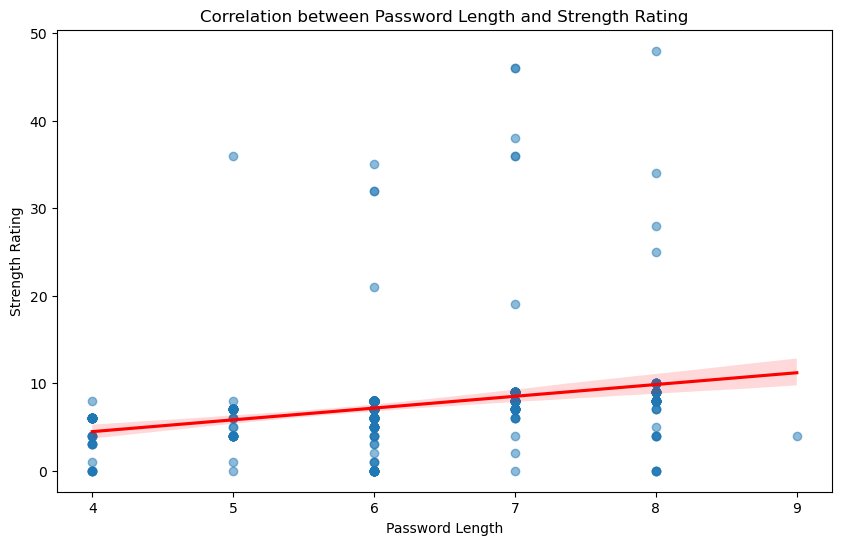

In [41]:
# Your answer here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already calculated the password length
passwords['password_length'] = passwords['password'].str.len()

# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='password_length', y='strength', data=passwords, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

# Set labels and title
plt.xlabel('Password Length')
plt.ylabel('Strength Rating')
plt.title('Correlation between Password Length and Strength Rating')

# Show the plot
plt.show()


**Bonus question 02**: Find all passwords with palindromes.

In [51]:
# Your answer here
# Function to check if a password is a palindrome
def is_palindrome(password):
    return password == password[::-1]

# Filter the DataFrame to get all palindrome passwords
palindrome_passwords = passwords[passwords['password'].apply(is_palindrome)]

# Display the resulting DataFrame with palindrome passwords
print(palindrome_passwords[['password']])


     password
18     111111
59     666666
76       1111
105    aaaaaa
144    xxxxxx
190    hannah
192  11111111
206   7777777
277    222222
285  xxxxxxxx
286    777777
291  88888888
314      2112
324      7777
352    zzzzzz
364    555555
371      2222
373      4444
409     11111
413    123321
420    999999
458    333333
472      xxxx
489    888888
